In [2]:
%pip install matplotlib

  Using cached matplotlib-3.10.6-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached numpy-2.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pillow-11.3.0-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
Using cached matplotlib-3.10.6-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (355 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 26.9 MB/s  0:00:00 eta 0:00:01
Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop

In [5]:
# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[0 0 0 1]
 [1 1 1 1]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 0 0 1]]


In [6]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

In [7]:
def leading_ones(ind):
    count = 0
    for bit in ind:
        if bit == 1:
            count += 1
        else:
            break
    return count

In [6]:
onemax(pop[5,:])

1

In [36]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [9]:
def proportional_selection(pop, fitness, selection_size):
    """
    Proportional (roulette wheel) selection.
    
    Arguments:
    pop -- population (numpy array of individuals)
    fitness -- fitness values for each individual
    selection_size -- number of individuals to select
    
    Returns:
    selected -- numpy array of selected individuals
    """
    fitness = np.array(fitness, dtype=float)

    # Avoid division by zero
    total_fitness = np.sum(fitness)
    if total_fitness == 0:
        # If all fitness = 0, select uniformly at random
        probs = np.ones(len(pop)) / len(pop)
    else:
        probs = fitness / total_fitness

    # Sample indices according to probabilities
    selected_indices = np.random.choice(len(pop), size=selection_size, replace=True, p=probs)

    return pop[selected_indices]

In [10]:
def tournament_selection(pop, fitness, selection_size, k=4):
    """
    Tournament selection (deterministic).
    
    Arguments:
    pop -- population (numpy array of individuals)
    fitness -- fitness values for each individual
    selection_size -- number of individuals to select
    k -- tournament size (default=4)
    
    Returns:
    selected -- numpy array of selected individuals
    """
    selected = []
    num_individuals = len(pop)

    for _ in range(selection_size):
        # Randomly sample k individuals
        competitors_idx = np.random.choice(num_individuals, size=k, replace=False)
        competitors_fit = fitness[competitors_idx]

        # Pick best one
        winner_idx = competitors_idx[np.argmax(competitors_fit)]
        selected.append(pop[winner_idx])

    return np.array(selected)

In [11]:
def uniform_crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [12]:
# Cài đặt hàm lai một điểm
def one_point_crossover(parents):
    num_individuals, num_parameters = parents.shape
    offspring = []
    indices = np.arange(num_individuals)
    np.random.shuffle(indices)

    for i in range(0, num_individuals, 2):
        p1 = parents[indices[i]].copy()
        p2 = parents[indices[i+1]].copy()

        cx_point = np.random.randint(1, num_parameters)  # random cut point
        child1 = np.concatenate([p1[:cx_point], p2[cx_point:]])
        child2 = np.concatenate([p2[:cx_point], p1[cx_point:]])

        offspring.append(child1)
        offspring.append(child2)

    return np.array(offspring)


In [13]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0

    return pop

In [14]:
def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals // 2

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        selected_indices = truncation_selection( pop, pop_fitness, selection_size )
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        offspring = uniform_crossover(selection_set)
        offspring = mutation(offspring, 0.1)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        pop = np.vstack([selection_set, offspring])
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

        if verbose:
            print(f'#Gen {i+1}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)


In [39]:
def ga_standard(objective, num_individuals, num_parameters, max_evaluations, 
                crossover_operator, verbose=False):
    """
    Standard GA with proportional selection.
    
    Arguments:
    objective -- fitness function
    num_individuals -- population size
    num_parameters -- number of bits per individual
    max_evaluations -- stopping criterion
    crossover_operator -- function for crossover (1X or UX)
    verbose -- print progress
    
    Returns:
    pop, pop_fitness, best_fitness (history)
    """
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []

    gen = 0
    while num_evaluations < max_evaluations:
        # Track best
        best_fitness.append([num_evaluations, np.max(pop_fitness)])

        # Selection (N parents)
        parents = proportional_selection(pop, pop_fitness, num_individuals)

        # Reproduce (N offspring)
        offspring = crossover_operator(parents)

        # Evaluate offspring
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        # Replace parents entirely
        pop = offspring
        pop_fitness = offspring_fitness

        gen += 1
        if verbose:
            print(f"#Gen {gen}: Best = {np.max(pop_fitness)}")

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    return pop, pop_fitness, best_fitness


In [16]:
def ga_popop(objective, num_individuals, num_parameters, max_evaluations, 
             crossover_operator, verbose=False):
    """
    GA POPOP with tournament selection and (P+O) replacement.
    
    Arguments:
    objective -- fitness function
    num_individuals -- population size
    num_parameters -- number of bits per individual
    max_evaluations -- stopping criterion
    crossover_operator -- function for crossover (1X or UX)
    verbose -- print progress
    
    Returns:
    pop, pop_fitness, best_fitness (history)
    """
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []

    gen = 0
    while num_evaluations < max_evaluations:
        # Track best
        best_fitness.append([num_evaluations, np.max(pop_fitness)])

        # Tournament selection for parents
        parents = tournament_selection(pop, pop_fitness, num_individuals, k=4)

        # Produce offspring
        offspring = crossover_operator(parents)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        # Merge parents + offspring (2N)
        combined_pop = np.vstack([pop, offspring])
        combined_fit = np.concatenate([pop_fitness, offspring_fitness])

        # Select best N individuals
        best_indices = np.argsort(combined_fit)[-num_individuals:]
        pop = combined_pop[best_indices]
        pop_fitness = combined_fit[best_indices]

        gen += 1
        if verbose:
            print(f"#Gen {gen}: Best = {np.max(pop_fitness)}")

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    return pop, pop_fitness, best_fitness


In [17]:
np.random.seed(42)
num_parameters = 100
num_individuals = 128
max_evaluations = 2**15
pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)

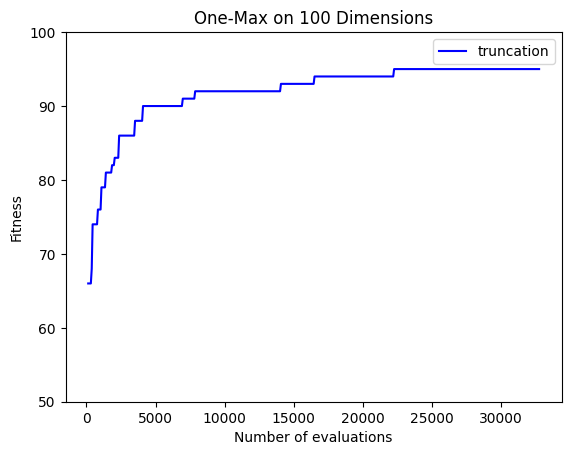

In [18]:
best_fitness = np.array(best_fitness)
plt.plot(best_fitness[:,0], best_fitness[:,1], label='truncation', color='b')
plt.xlabel("Number of evaluations")
plt.ylabel("Fitness")
plt.ylim(num_parameters/2, num_parameters)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

In [19]:
n_trials = 10
num_parameters = 50
max_evaluations = 10000
num_individuals = 24 # population size

fits_truncation = []
evals = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals = best_fitness[:,0]
    fits_truncation.append(best_fitness[:,1])

In [20]:
fits_truncation = np.array(fits_truncation)

In [21]:
fits_truncation

array([[33, 35, 36, ..., 50, 50, 50],
       [32, 36, 38, ..., 50, 50, 50],
       [32, 33, 35, ..., 50, 50, 50],
       ...,
       [29, 32, 32, ..., 50, 50, 50],
       [32, 32, 34, ..., 50, 50, 50],
       [33, 34, 34, ..., 50, 50, 50]], shape=(10, 833))

In [22]:
avg = np.mean(fits_truncation, axis=0)
err = np.std(fits_truncation, axis=0)
avg

array([32.6, 33.7, 35. , 35.7, 36.8, 37.5, 37.8, 38.1, 38.4, 39. , 39.4,
       39.8, 40.2, 40.8, 41. , 41.1, 41.6, 41.8, 42.8, 43.8, 43.8, 43.8,
       44.2, 44.6, 44.8, 44.8, 44.8, 45.1, 45.4, 45.6, 45.7, 45.7, 45.8,
       45.8, 45.8, 45.8, 45.9, 45.9, 45.9, 46.1, 46.1, 46.6, 46.6, 46.6,
       46.6, 46.7, 46.7, 46.7, 46.8, 46.9, 46.9, 47. , 47. , 47. , 47. ,
       47.1, 47.1, 47.1, 47.1, 47.4, 47.4, 47.4, 47.4, 47.4, 47.4, 47.4,
       47.5, 47.7, 47.7, 47.9, 47.9, 47.9, 48.3, 48.3, 48.3, 48.3, 48.3,
       48.3, 48.3, 48.3, 48.3, 48.3, 48.3, 48.3, 48.3, 48.3, 48.3, 48.4,
       48.5, 48.5, 48.5, 48.5, 48.5, 48.6, 48.6, 48.7, 48.7, 48.7, 48.7,
       48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7,
       48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7,
       48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7,
       48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.7, 48.8, 48.8,
       48.8, 48.8, 48.8, 48.8, 48.8, 48.8, 48.8, 48

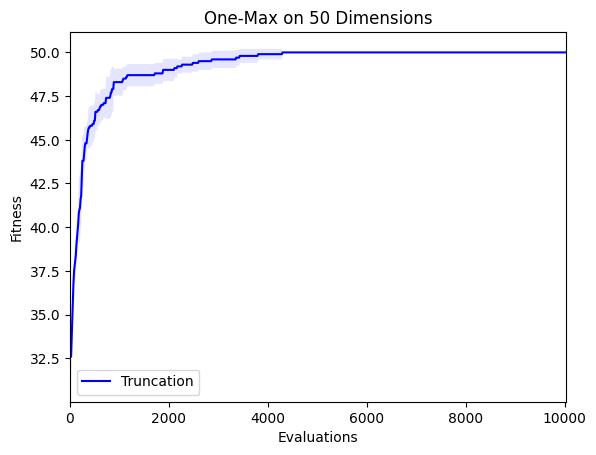

In [23]:
plt.plot(evals, avg, label="Truncation", color='b')
plt.fill_between(evals, avg+err, avg-err, facecolor='b', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

In [50]:
def one_max_evaluations(num_parameters, max_evaluations, population_size, ga_variant, crossover_operator):
    n_trials = 10

    fits_truncation = []
    evals = []
    for i in range(n_trials):
        pop, pop_fitness, best_fitness = ga_variant(onemax, population_size, num_parameters, max_evaluations, crossover_operator)
        best_fitness = np.array(best_fitness)
        if i == 0:
            evals = best_fitness[:,0]
        fits_truncation.append(best_fitness[:,1])
    fits_truncation = np.array(fits_truncation)
    print(fits_truncation)
    avg = np.mean(fits_truncation, axis=0)
    err = np.std(fits_truncation, axis=0)
    plt.plot(evals, avg, label="Truncation", color='b')
    plt.fill_between(evals, avg+err, avg-err, facecolor='b', alpha=0.1)

    plt.xlabel("Evaluations")
    plt.ylabel("Fitness")
    plt.xlim(0, max_evaluations+num_individuals)
    plt.title(f"One-Max on {num_parameters} Dimensions")
    plt.legend();

In [51]:
def leading_ones_evaluations(num_parameters, max_evaluations, population_size, ga_variant, crossover_operator):
    n_trials = 10

    fits_truncation = []
    evals = []
    for i in range(n_trials):
        pop, pop_fitness, best_fitness = ga_variant(leading_ones, population_size, num_parameters, max_evaluations, crossover_operator)
        best_fitness = np.array(best_fitness)
        if i == 0:
            evals = best_fitness[:,0]
        fits_truncation.append(best_fitness[:,1])
    fits_truncation = np.array(fits_truncation)
    print(fits_truncation)
    avg = np.mean(fits_truncation, axis=0)
    err = np.std(fits_truncation, axis=0)
    plt.plot(evals, avg, label="Truncation", color='b')
    plt.fill_between(evals, avg+err, avg-err, facecolor='b', alpha=0.1)

    plt.xlabel("Evaluations")
    plt.ylabel("Fitness")
    plt.xlim(0, max_evaluations+num_individuals)
    plt.title(f"One-Max on {num_parameters} Dimensions")
    plt.legend();

# 1. 50 bit OneMax trials and evaluations


## 1.1  GA gốc/1X

[[31 31 32 ... 32 32 32]
 [31 32 31 ... 26 26 26]
 [30 31 32 ... 33 33 33]
 ...
 [36 32 35 ... 38 38 38]
 [37 38 34 ... 34 34 34]
 [31 32 31 ... 31 31 31]]


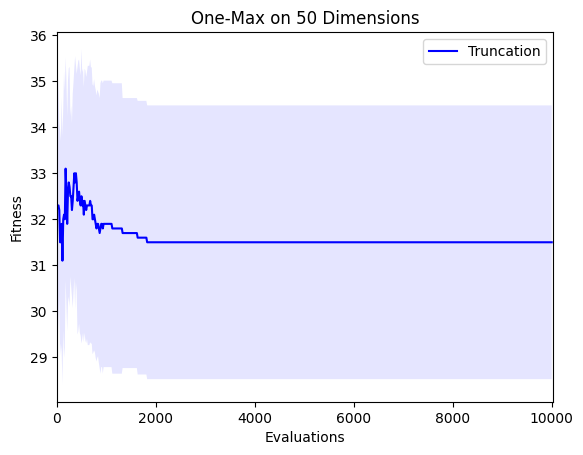

In [40]:
one_max_evaluations(50, 10000, 16, ga_standard, one_point_crossover)

## 1.2  GA gốc/UX

[[29 31 32 ... 32 32 32]
 [29 30 31 ... 24 24 24]
 [36 31 29 ... 30 30 30]
 ...
 [32 30 33 ... 31 31 31]
 [31 31 34 ... 33 33 33]
 [30 33 33 ... 38 38 38]]


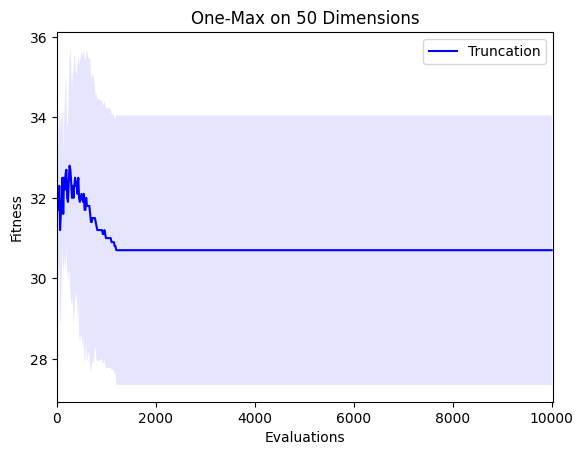

In [41]:
one_max_evaluations(50, 10000, 16, ga_standard, uniform_crossover)

## 1.3  GA POPOP/1X

[[30 31 35 ... 37 37 37]
 [30 31 31 ... 34 34 34]
 [28 33 33 ... 35 35 35]
 ...
 [35 36 38 ... 41 41 41]
 [33 35 36 ... 37 37 37]
 [30 31 32 ... 37 37 37]]


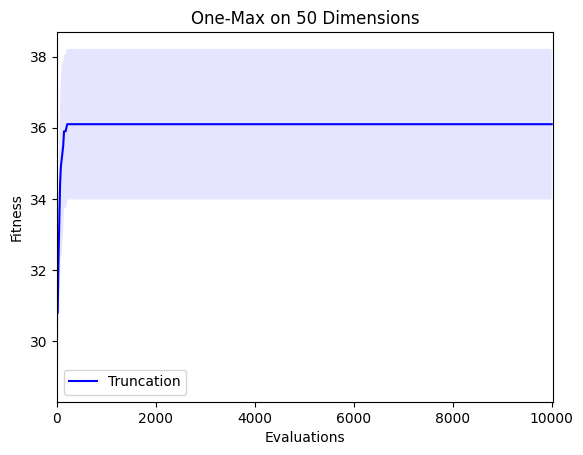

In [42]:
one_max_evaluations(50, 10000, 16, ga_popop, one_point_crossover)

## 1.4  GA POPOP/UX

[[32 34 36 ... 42 42 42]
 [33 34 38 ... 44 44 44]
 [31 31 32 ... 43 43 43]
 ...
 [31 33 35 ... 40 40 40]
 [30 35 37 ... 46 46 46]
 [31 31 33 ... 38 38 38]]


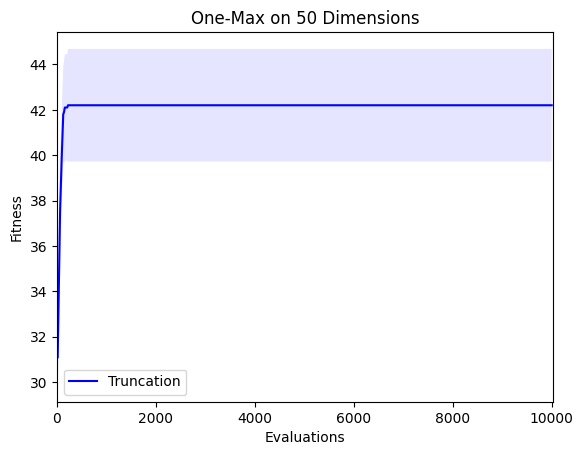

In [43]:
one_max_evaluations(50, 10000, 16, ga_popop, uniform_crossover)

# 2. 100 bit OneMax trials and evaluations


## 2.1  GA gốc/1X

[[62 67 66 ... 74 74 74]
 [58 60 61 ... 76 76 76]
 [60 60 60 ... 69 69 69]
 ...
 [62 62 66 ... 72 72 72]
 [65 58 61 ... 69 69 69]
 [64 65 63 ... 77 77 77]]


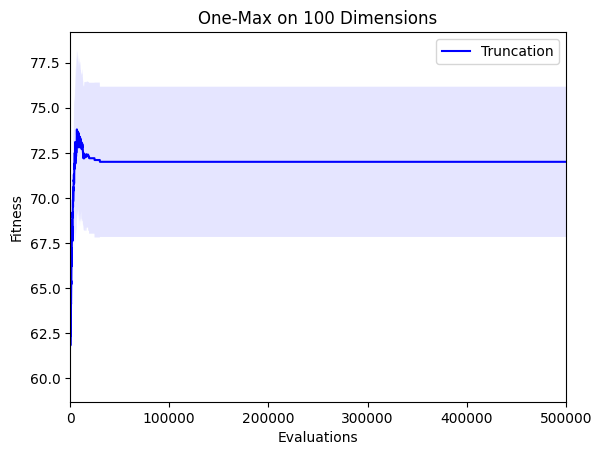

In [46]:
one_max_evaluations(100, 500000, 64, ga_standard, one_point_crossover)

## 2.2  GA gốc/UX

[[61 62 61 ... 68 68 68]
 [66 61 62 ... 73 73 73]
 [65 59 59 ... 71 71 71]
 ...
 [62 62 63 ... 78 78 78]
 [63 63 61 ... 76 76 76]
 [61 61 63 ... 74 74 74]]


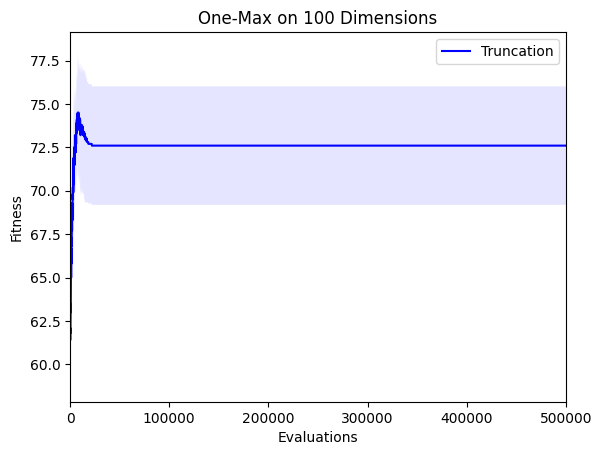

In [47]:
one_max_evaluations(100, 500000, 64, ga_standard, uniform_crossover)

## 2.3  GA POPO/1X

[[60 64 64 ... 81 81 81]
 [62 66 71 ... 77 77 77]
 [60 62 64 ... 77 77 77]
 ...
 [62 63 67 ... 85 85 85]
 [65 65 68 ... 82 82 82]
 [58 64 66 ... 87 87 87]]


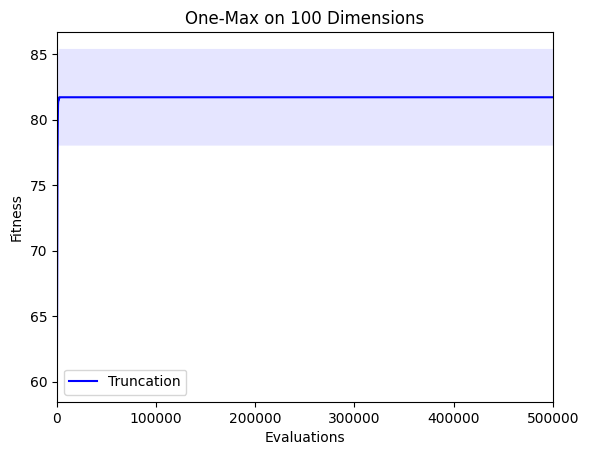

In [48]:
one_max_evaluations(100, 500000, 64, ga_popop, one_point_crossover)

## 2.4  GA POPO/UX

[[62 63 67 ... 99 99 99]
 [59 63 69 ... 98 98 98]
 [61 64 68 ... 99 99 99]
 ...
 [63 63 66 ... 99 99 99]
 [66 66 69 ... 97 97 97]
 [59 63 68 ... 98 98 98]]


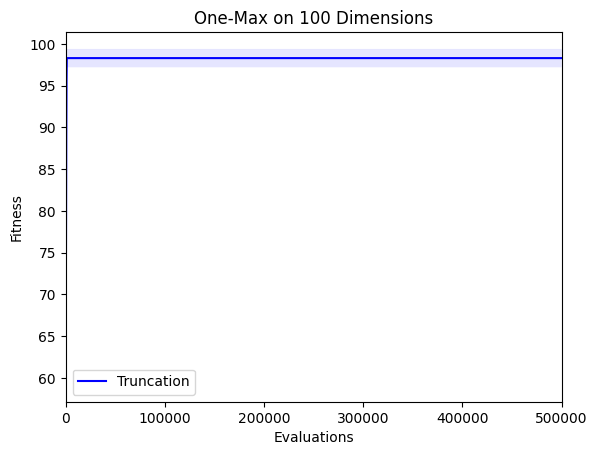

In [49]:
one_max_evaluations(100, 500000, 64, ga_popop, uniform_crossover)

### Với bài toán OneMax, phép lai ghép đồng nhất (UX) phù hợp hơn, GA phiên bản POPO đạt hiệu năng cao hơn.

# 3. 10 bit LeadingOnes trials and evaluations


## 3.1  GA gốc/1X

[[6 6 6 ... 6 6 6]
 [3 8 8 ... 9 9 9]
 [5 5 5 ... 5 5 5]
 ...
 [4 4 4 ... 4 4 4]
 [4 4 5 ... 5 5 5]
 [6 6 6 ... 6 6 6]]


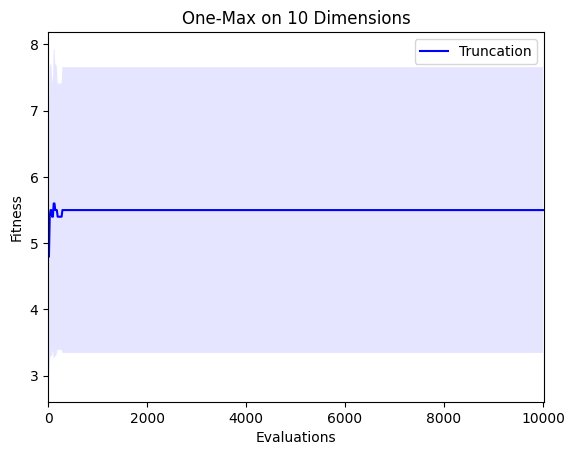

In [52]:
leading_ones_evaluations(10, 10000, 16, ga_standard, one_point_crossover)

## 3.2  GA gốc/UX

[[ 1  1  1 ...  1  1  1]
 [ 4  6  8 ... 10 10 10]
 [ 5  5  5 ...  5  5  5]
 ...
 [ 8  9  9 ...  9  9  9]
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]]


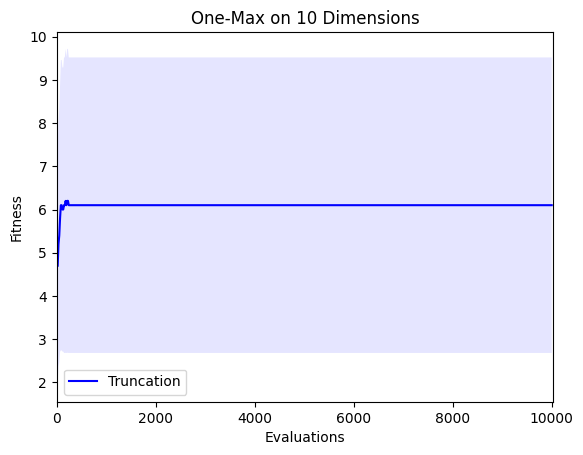

In [53]:
leading_ones_evaluations(10, 10000, 16, ga_standard, uniform_crossover)

## 3.3  GA POPO/1X

[[3 3 3 ... 3 3 3]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 ...
 [3 6 6 ... 6 6 6]
 [6 7 7 ... 7 7 7]
 [4 4 4 ... 4 4 4]]


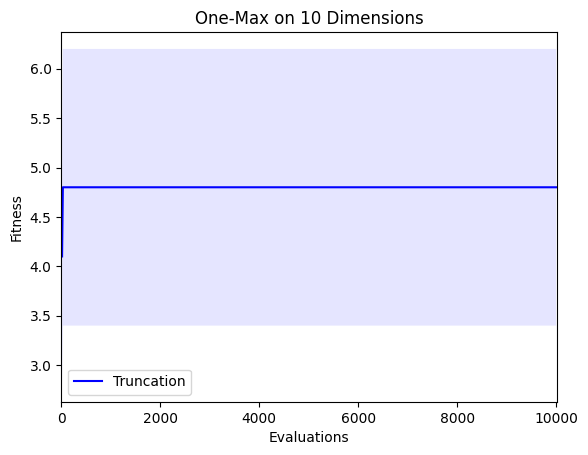

In [55]:
leading_ones_evaluations(10, 10000, 16, ga_popop, one_point_crossover)

## 3.4  GA POPO/UX

[[3 7 7 ... 7 7 7]
 [5 5 5 ... 5 5 5]
 [2 4 4 ... 4 4 4]
 ...
 [6 6 6 ... 6 6 6]
 [2 3 7 ... 7 7 7]
 [5 5 9 ... 9 9 9]]


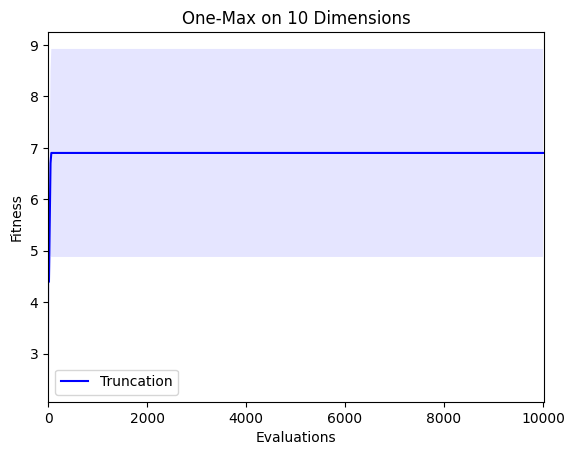

In [56]:
leading_ones_evaluations(10, 10000, 16, ga_popop, uniform_crossover)

# 4. 20 bit LeadingOnes trials and evaluations


## 4.1  GA gốc/1X

[[ 4  5  6 ... 12 12 12]
 [ 5  5  7 ... 15 15 15]
 [ 7  7 10 ... 11 11 11]
 ...
 [ 8  8  9 ... 11 11 11]
 [ 4  4  5 ... 14 14 14]
 [ 6  8  8 ... 20 20 20]]


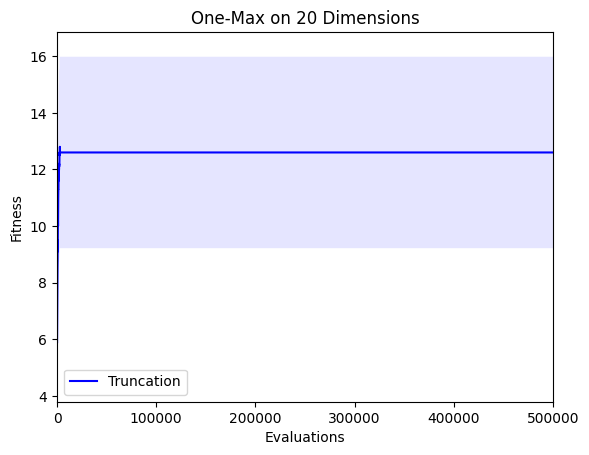

In [59]:
leading_ones_evaluations(20, 500000, 64, ga_standard, one_point_crossover)

## 4.2  GA gốc/UX

[[ 5  6  9 ... 14 14 14]
 [ 5  9  8 ...  9  9  9]
 [ 6  9  9 ... 14 14 14]
 ...
 [ 8  8 10 ... 16 16 16]
 [ 8 10  9 ... 18 18 18]
 [ 7  7  9 ...  9  9  9]]


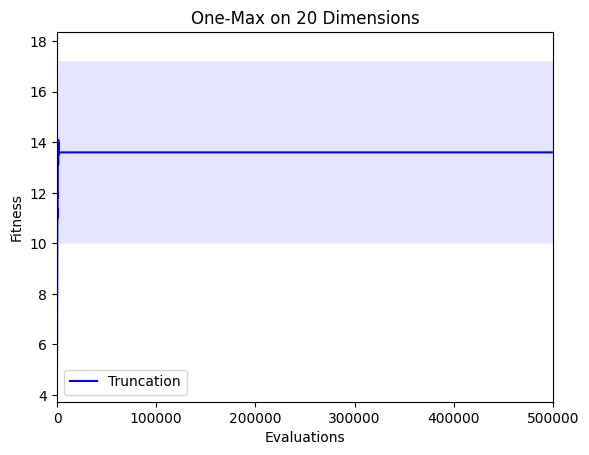

In [60]:
leading_ones_evaluations(20, 500000, 64, ga_standard, uniform_crossover)

## 4.3  GA POPO/1X

[[14 16 17 ... 19 19 19]
 [15 16 18 ... 20 20 20]
 [16 17 17 ... 20 20 20]
 ...
 [15 16 19 ... 20 20 20]
 [16 16 17 ... 20 20 20]
 [14 17 17 ... 19 19 19]]


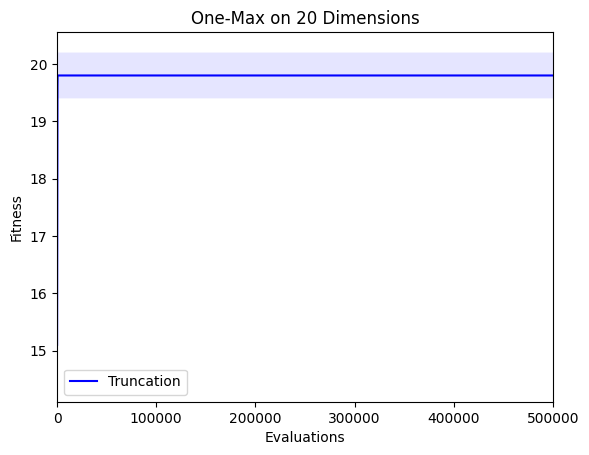

In [61]:
one_max_evaluations(20, 500000, 64, ga_popop, one_point_crossover)

## 4.4  GA POPO/UX

[[16 18 20 ... 20 20 20]
 [15 16 18 ... 20 20 20]
 [15 17 18 ... 20 20 20]
 ...
 [15 16 18 ... 20 20 20]
 [16 17 18 ... 20 20 20]
 [16 17 18 ... 20 20 20]]


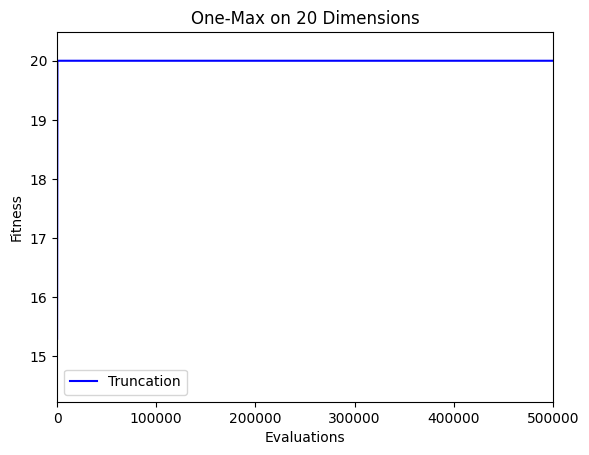

In [62]:
one_max_evaluations(20, 500000, 64, ga_popop, uniform_crossover)

### Với bài toán LeadingOnes, phép lai ghép đồng nhất (UX) phù hợp hơn, GA phiên bản POPO đạt hiệu năng cao hơn.

# Kết luận:
- Trong các thực nghiệm, GA_POPOP luôn cho kết quả tốt hơn GA chuẩn.
- Chọn lọc giao đấu tạo ra áp lực chọn lọc mạnh, đảm bảo chỉ những cá thể tốt hơn mới có cơ hội sinh sản, loại bỏ cá thể kém. Giúp cho thuật toán hội tụ nhanh.
- Phép lai đồng nhất (uniform crossover) hiệu qua hơn phép lai một điểm (one point crossover) trong cả 2 bài toán OneMax và LeadingOnes